In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv("playstore-analysis.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [7]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
# Drop records where rating is missing since rating is our target/study variable

data1=data.dropna(axis=0, how="any", subset=['Rating'],inplace=False)

In [9]:
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [10]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
# Check the null values for the Android Ver column.
# i. Are all 3 records having the same problem?


data1[data1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
# Drop the 3rd record i.e. record for “Life Made WIFI ...”

data2=data1.drop([10472])

In [13]:
data2['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    0
Name: Price, Length: 9366, dtype: object

In [14]:
# Replace remaining missing values with the mode

data2['Android Ver'] = data2['Android Ver'].fillna(data2['Android Ver'].mode()[0])

In [15]:
data2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [16]:
# Current ver – replace with most common value

data2['Current Ver'] = data2['Current Ver'].fillna(data2['Current Ver'].mode()[0])

In [17]:
# Which all variables need to be brought to numeric types?- Rating, review, Size,Intalls, Price

In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [19]:
# Price variable – remove $ sign and convert to float

data2['Price'] = data2.Price.apply(lambda x: x.strip('$'))

In [20]:
data2['Price'].value_counts()

0         8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

In [21]:
data2['Price'] = data2['Price'].astype('float')

In [22]:
# Installs – remove ‘,’ and ‘+’ sign, convert to integer

data2['Installs'] = data2['Installs'].str.replace(',', '')

In [23]:
data['Installs'] = data['Installs'].str.replace('+', '')

/var/folders/h3/wl4wc4ts2rzd8d8_gg1hdngh0000gn/T/ipykernel_2372/4230444306.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Installs'] = data['Installs'].str.replace('+', '')


In [24]:
data2['Installs'] = data2.Installs.apply(lambda x: x.strip('+'))

In [25]:
data2['Installs'].value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [26]:
data2['Installs'] = data2['Installs'].astype('int')

In [27]:
data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


In [29]:
#Convert all other identified columns to numeric

data2['Reviews'] = data2['Reviews'].astype('int')

In [30]:
data2['Size'] = data2['Size'].astype('int')

In [31]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   int64  
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.0+ MB


In [32]:
# Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
# Are there any such records? Drop if so.----- No

data2.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,22705.641149,1.789744e+07,0.960928
std,0.515219,3.144042e+06,21305.045347,9.123822e+07,15.816585
min,1.000000,1.000000e+00,8.000000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [33]:
#  Reviews should not be more than installs as only those who installed can review the app. 
# Are there any such records? Drop if so.

data3 = data2[data2.Reviews <= data2.Installs]


In [34]:
data3.describe()

,Rating,Reviews,Size,Installs,Price
count,9359.000000,9.359000e+03,9359.000000,9.359000e+03,9359.000000
mean,4.191174,5.144332e+05,22710.676247,1.791083e+07,0.961116
std,0.514966,3.145187e+06,21311.279479,9.127102e+07,15.822478
min,1.000000,1.000000e+00,8.000000,5.000000e+00,0.000000
25%,4.000000,1.870000e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.960000e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.164100e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


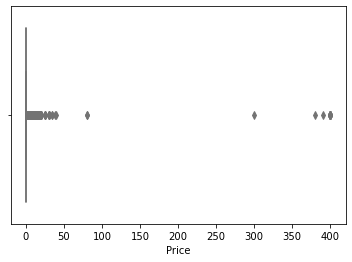

In [35]:
#Identify and handle outliers –
# Price column
# Make suitable plot to identify outliers in price


sns.boxplot(x='Price',data=data3,palette='rainbow');

In [36]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [37]:
# Do you expect apps on the play store to cost $200? Check out these cases

data[data.values == '$200.00']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9719,EP Cook Book,MEDICAL,NaN,0,3200.0,0,Paid,$200.00,Everyone,Medical,"July 26, 2015",1.0,3.0 and up


In [38]:
# Limit data to records with price < $30


data4 = data3[data3['Price'] < 30]

In [39]:
data4.describe()

,Rating,Reviews,Size,Installs,Price
count,9338.000000,9.338000e+03,9338.000000,9.338000e+03,9338.000000
mean,4.191776,5.155891e+05,22725.696509,1.795108e+07,0.301915
std,0.515031,3.148627e+06,21310.345622,9.136965e+07,1.669887
min,1.000000,1.000000e+00,8.000000,5.000000e+00,0.000000
25%,4.000000,1.890000e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,6.011500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.247100e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,29.990000


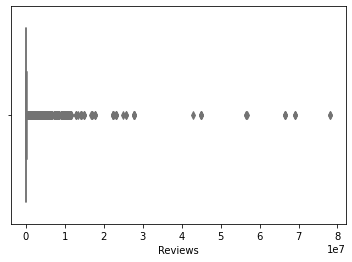

In [40]:
# Reviews column
# Make suitable plot

sns.boxplot(x='Reviews',data=data3,palette='rainbow');

In [41]:
# Limit data to apps with < 1 Million reviews

data5 = data4[data4['Reviews'] < 1000000]

In [42]:
data5.describe()

,Rating,Reviews,Size,Installs,Price
count,8634.000000,8634.000000,8634.000000,8.634000e+03,8634.000000
mean,4.172492,68383.348853,21636.381052,4.288536e+06,0.324913
std,0.528913,156335.806417,20663.668988,2.864650e+07,1.731362
min,1.000000,1.000000,8.000000,5.000000e+00,0.000000
25%,4.000000,143.250000,6000.000000,1.000000e+04,0.000000
50%,4.300000,3641.000000,18000.000000,1.000000e+05,0.000000
75%,4.500000,46070.500000,26000.000000,1.000000e+06,0.000000
max,5.000000,995002.000000,100000.000000,1.000000e+09,29.990000


In [43]:
data5.shape

(8634, 13)

In [44]:
# What is the 95th percentile of the installs?


val = data5.Installs.quantile(0.95) 
print(val)

10000000.0


In [45]:
# Drop records having a value more than the 95th percentile

data6=data5[data5.Installs < data5.Installs.quantile(.95)]

In [46]:
data6.shape

(7258, 13)

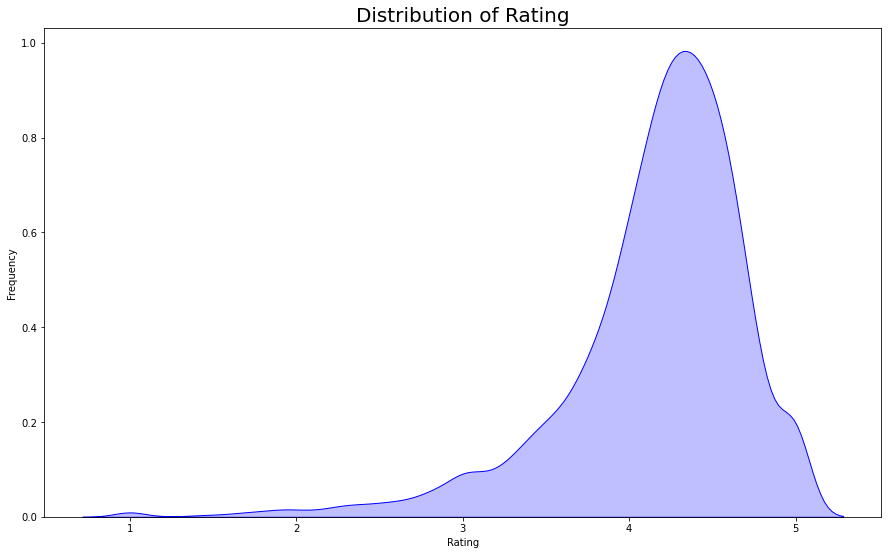

In [47]:
#  What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
#  How do you explain this? its skewed towards negative side.



plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(data6.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

In [48]:
#  What are the top Content Rating values?
#  Are there any values with very few records?


data5['Content Rating'].value_counts()

Everyone           6943
Teen                933
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [49]:
# If yes, drop those as they won’t help in the analysis



Adult_rating = data6[data6['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =data6[data6['Content Rating'] == 'Unrated'].index.to_list()
data6.drop(Adult_rating, inplace = True)
data6.drop(unrated, inplace = True)
data6['Content Rating'].value_counts()


/Users/shabeer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Everyone        5913
Teen             746
Mature 17+       346
Everyone 10+     249
Name: Content Rating, dtype: int64

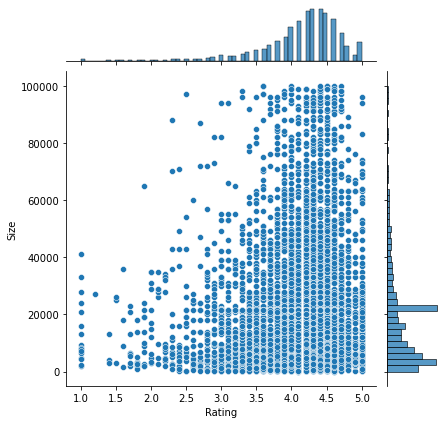

In [50]:
# Effect of size on rating- apps with less size are popular
# Make a joinplot to understand the effect of size on rating- apps having ratings between 3.5 and 4.5 are high.



sns.jointplot(x='Rating',y='Size',data=data6,kind='scatter');

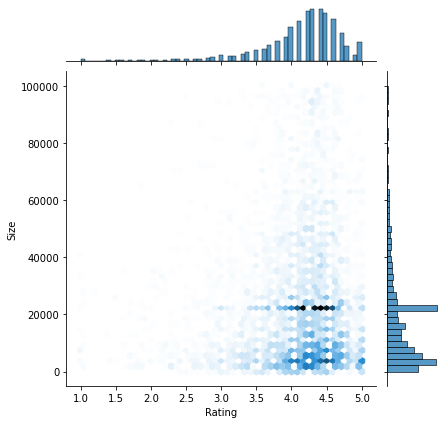

In [51]:
sns.jointplot(x='Rating',y='Size',data=data6,kind='hex');

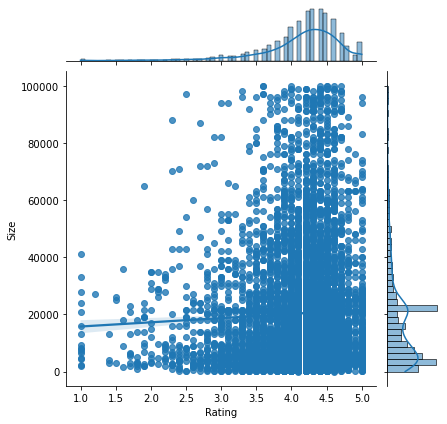

In [52]:
sns.jointplot(x='Rating',y='Size',data=data6,kind='reg');

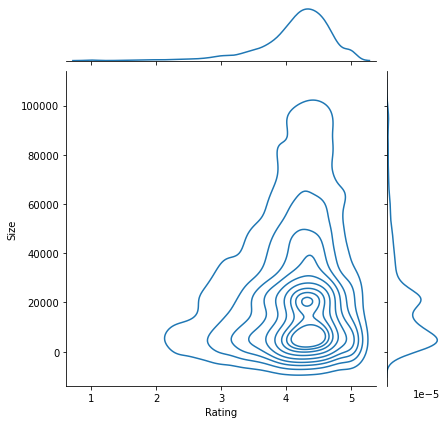

In [53]:
sns.jointplot(x='Rating',y='Size',data=data6,kind='kde');

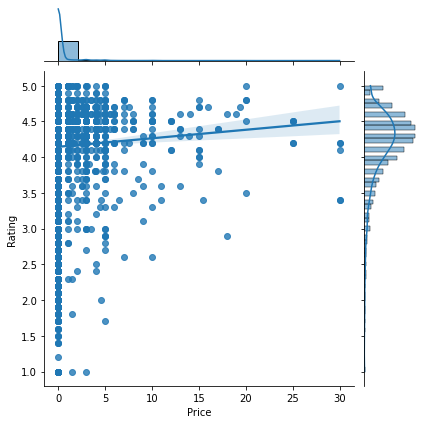

In [54]:
# Effect of price on rating - price increases rating decreases.
# Make a jointplot (with regression line)


sns.jointplot(x='Price',y='Rating',data=data6,kind='reg');

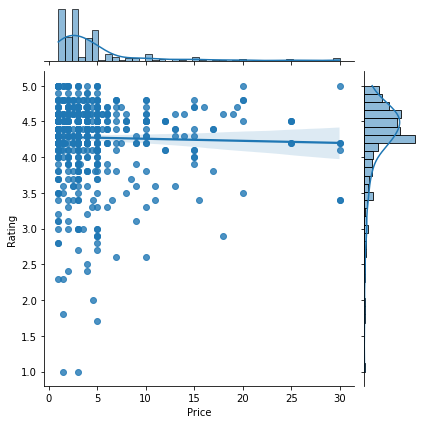

In [55]:
# Replot the data, this time with only records with price > 0


Price_gt_zero = data6[data6['Price'] > 0]
sns.jointplot(x ="Price" , y = "Rating" ,data = Price_gt_zero, kind = "reg" )
plt.show()

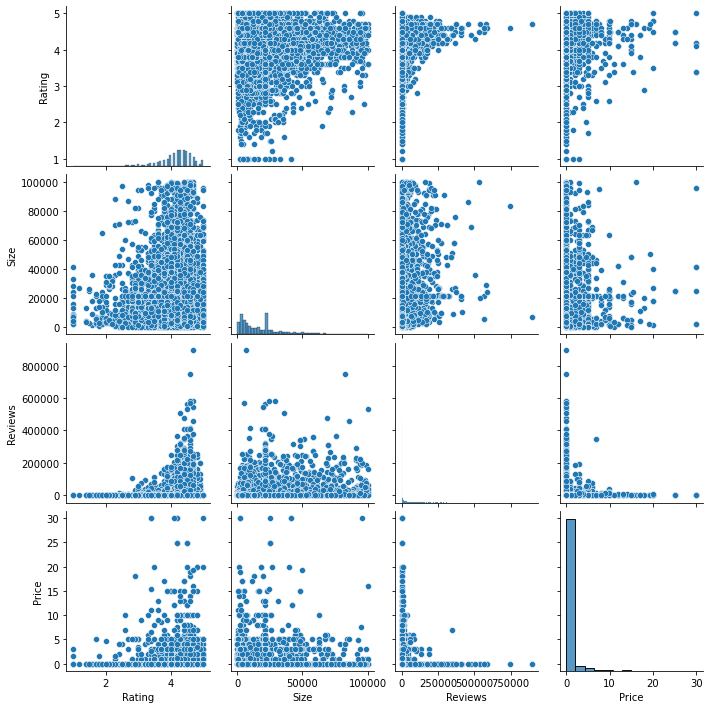

In [56]:
# Look at all the numeric interactions together –
# Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'


sns.pairplot(data6,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

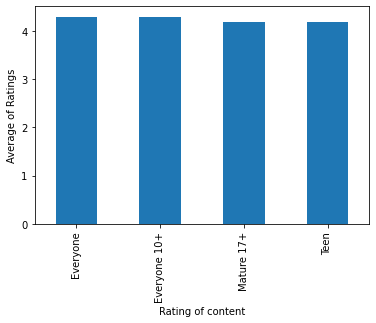

In [57]:
#  Rating vs. content rating
#  Make a bar plot displaying the rating for each content rating


x = data6['Rating'].groupby(data6['Content Rating']).median().plot(kind = 'bar')
x.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

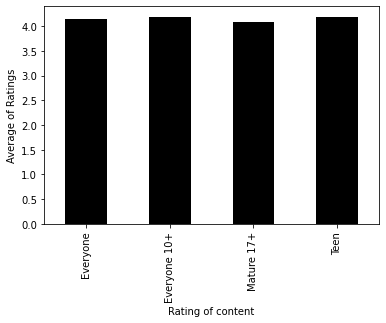

In [58]:
y = data6['Rating'].groupby(data6['Content Rating']).mean().plot(kind = 'bar',color='black')
y.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

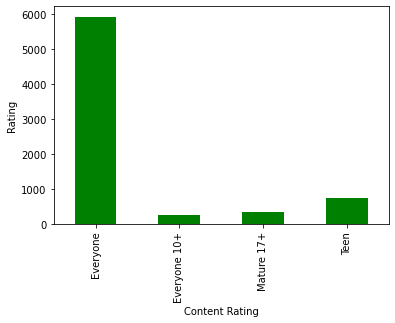

In [59]:
# Choose the right metric and plot

data6.groupby(['Content Rating'])['Rating'].count().plot.bar(color="g")
plt.ylabel('Rating')
plt.show()

In [60]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


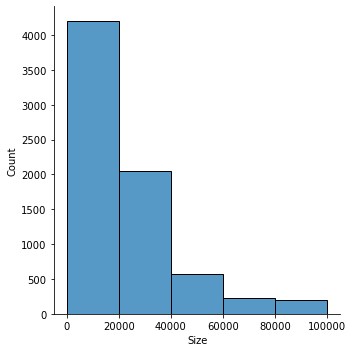

In [61]:
# Content rating vs. size vs. rating – 3 variables at a time
# Create 5 buckets (20% records in each) based on Size

sns.displot(data6["Size"], bins=5)
plt.show()

In [66]:
# By content rating Vs Size buckets, get the rating (20th percentile) for each combination


bins=[0, 4600, 12000, 21516, 32000, 100000]
data6['Size_Buckets'] = pd.cut(data6['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(data6, values='Rating', index='Size_Buckets', columns='Content Rating')

/var/folders/h3/wl4wc4ts2rzd8d8_gg1hdngh0000gn/T/ipykernel_2372/2142830770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6['Size_Buckets'] = pd.cut(data6['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])


Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.109383,4.188889,3.948485,4.210870
LOW,4.149397,4.192593,4.120213,4.208800
MED,4.184393,4.201471,3.948315,4.115534
HIGH,4.143680,4.226190,4.145283,4.186047
VERY HIGH,4.152523,4.171277,4.192208,4.227848


In [62]:
data6.Size.quantile([0.2, 0.4,0.6,0.8])

0.2     4100.0
0.4     9800.0
0.6    21516.0
0.8    31000.0
Name: Size, dtype: float64

In [63]:

data6.Rating.quantile([0.2, 0.4,0.6,0.8])

0.2    3.8
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

In [67]:
Size_Buckets =pd.pivot_table(data6, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.8,3.84,3.24,3.82
LOW,3.8,3.92,3.60,3.80
MED,3.9,4.04,3.56,3.90
HIGH,3.8,4.00,3.90,4.00
VERY HIGH,3.8,3.90,4.00,4.00


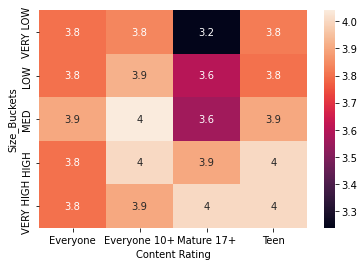

In [68]:
# Heatmap - Annoted

sns.heatmap(Size_Buckets, annot = True)
plt.show()

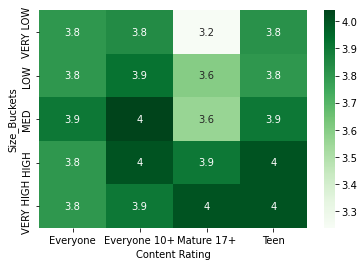

In [69]:
# Greens color map

sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

In [ ]:
# whats your inference? are lighter apps preferred in all categories? heavier? some?

# apps with larger size have good ratings than lighter apps. As we goes down wuth the size of the app, the rating
# corresponding to each category also decreases.